In [1]:
import numpy as np
%matplotlib inline
import pylab as pl

### 操作多维数组

In [2]:
a = np.arange(3)
b = np.arange(10, 13)

v = np.vstack((a, b))
h = np.hstack((a, b))
c = np.column_stack((a, b))
%C v; h; c

      v                    h                  c     
--------------  ------------------------  ----------
[[ 0,  1,  2],  [ 0,  1,  2, 10, 11, 12]  [[ 0, 10],
 [10, 11, 12]]                             [ 1, 11],
                                           [ 2, 12]]


In [3]:
np.c_[a, b, a+b]

array([[ 0, 10, 10],
       [ 1, 11, 12],
       [ 2, 12, 14]])

In [ ]:
#%hide
np.set_printoptions(linewidth=25)

In [4]:
np.random.seed(42)
a = np.random.randint(0, 10, 12)
idx = np.nonzero(np.diff(a) < 0)[0] + 1
%C a; idx; np.split(a, idx)

           a                      idx            np.split(a, idx) 
------------------------  --------------------  ------------------
[6, 3, 7, 4, 6, 9, 2, 6,  [ 1,  3,  6,  9, 10]  [array([6]),      
 7, 4, 3, 7]                                     array([3, 7]),   
                                                 array([4, 6, 9]),
                                                 array([2, 6, 7]),
                                                 array([4]),      
                                                 array([3, 7])]   


In [5]:
%C np.split(a, 6); np.array_split(a, 5)

 np.split(a, 6)  np.array_split(a, 5)
---------------  --------------------
[array([6, 3]),  [array([6, 3, 7]),  
 array([7, 4]),   array([4, 6, 9]),  
 array([6, 9]),   array([2, 6]),     
 array([2, 6]),   array([7, 4]),     
 array([7, 4]),   array([3, 7])]     
 array([3, 7])]                      


In [6]:
a = np.random.randint(0, 10, (2, 3, 4, 5))
print(("原数组形状:", a.shape))
print(("transpose:", np.transpose(a, (1, 2, 0, 3)).shape))
print(("swapaxes:", np.swapaxes(a, 1, 2).shape))

原数组形状: (2, 3, 4, 5)
transpose: (3, 4, 2, 5)
swapaxes: (2, 4, 3, 5)


In [2]:
import glob
import numpy as np
from cv2 import imread, imwrite

imgs = []
for fn in glob.glob("thumbnails/*.png"):
    imgs.append(imread(fn, -1))
    
print((imgs[0].shape))

(90, 160, 3)


In [3]:
img = np.concatenate(imgs, 0)
img.shape

(2700, 160, 3)

In [4]:
img1 = img.reshape(6, 5, 90, 160, 3)
img1[0, 1].shape

(90, 160, 3)

In [7]:
img2 = img1.swapaxes(1, 2).reshape(540, 800, 3)

In [8]:
img = np.concatenate(imgs, 0)
img3 = img.reshape(5, 6, 90, 160, 3) \
          .transpose(1, 2, 0, 3, 4)  \
          .reshape(540, 800, 3)

In [9]:
img = np.concatenate(imgs, 0)
img1 = img.reshape(6, 5, 90, 160, 3)
mask = np.ones(img1.shape[:-1], dtype=bool) #❶
mask[:, :, 2:-2, 2:-2] = False              #❷
img1[mask] = 230                            #❸
img4 = img1.swapaxes(1, 2).reshape(540, 800, 3)

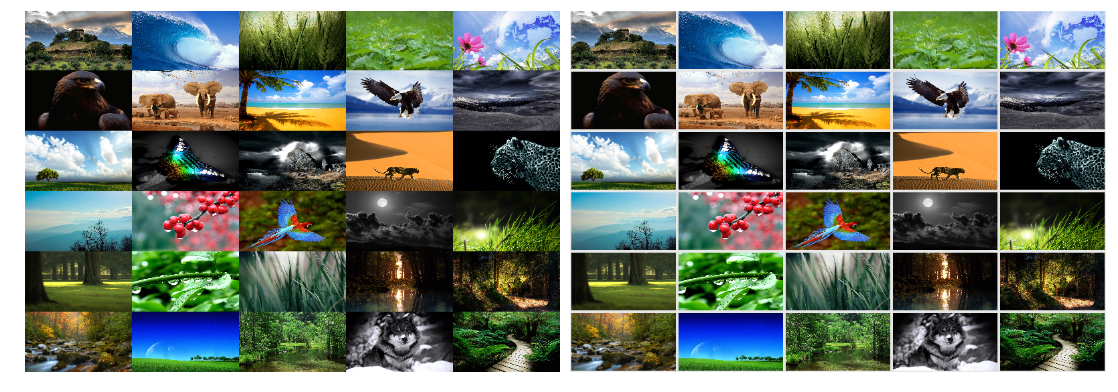

In [10]:
#%figonly=使用操作多维数组的函数拼接多幅缩略图
fig, (ax1, ax2) = pl.subplots(1, 2, figsize=(15, 6))
ax1.imshow(img2[:, :, ::-1])
ax2.imshow(img4[:, :, ::-1])
ax1.axis("off")
ax2.axis("off")
fig.subplots_adjust(0, 0, 1, 1, 0.02, 0)